In [1]:
import tensorflow as tf
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
print("TensorFlow version:", tf.__version__)
tf.enable_eager_execution()

TensorFlow version: 1.15.0



In [2]:
def exp_map(H):
        epsilon = 1e-6
        # H.shape: batch x n-1 x k
        n_minus_1 = int(H.shape[-2])
        zero_row = tf.zeros((1,n_minus_1))        # 1 x n-1
        I = tf.eye(n_minus_1)                     # n-1 x n-1
        zero_I = tf.concat((zero_row, I), axis=0) # n x n-1

        v_mat = tf.matmul(zero_I, H)                  # batch x n x k
        #print('v_mat', v_mat)
        # v_mat = v_mat + tf.eye(n_minus_1+1,1)
        # print('v_mat', v_mat)
        v_norm_vec = tf.linalg.norm(v_mat,axis=1)     # batch x k
        #print('v_norm_vec', v_norm_vec)
        v_norm_row_vec = tf.expand_dims(v_norm_vec,1) # batch x 1 x k
        #print('v_norm_row_vec', v_norm_row_vec)
        v_norm_diag = tf.linalg.diag(v_norm_vec)      # batch x k x k
        inv_v_norm_diag = tf.linalg.diag(1/(v_norm_vec+epsilon))
        sin_over_norm = tf.linalg.matmul(tf.math.sin(v_norm_diag),inv_v_norm_diag) # batch x k x k
        #print('sin_over_norm', sin_over_norm)

        e1 = tf.eye(n_minus_1+1,1) # n x 1
        #print(e1.shape)
        cos_term = tf.linalg.matmul(e1, tf.math.cos(v_norm_row_vec))
        sin_term = tf.linalg.matmul(v_mat, sin_over_norm)
        
        exp_mapped_vs = cos_term+sin_term
        #print(exp_mapped_vs.shape)
        #print('zI',zero_I.shape)
        #print(tf.linalg.norm(exp_mapped_vs,axis=1))
        #input('wait')
        return exp_mapped_vs

In [3]:
H = tf.random.uniform(shape=[1,6,1],minval=-10,maxval=10)

2022-07-25 12:15:58.085474: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-07-25 12:15:58.112796: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3392040000 Hz
2022-07-25 12:15:58.113132: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55edbbb40db0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-25 12:15:58.113151: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [4]:
out = exp_map(H)
print(out)
print(tf.norm(out))

tf.Tensor(
[[[ 0.8489716 ]
  [ 0.25971445]
  [ 0.35102975]
  [-0.2708115 ]
  [-0.08435857]
  [ 0.04828288]
  [-0.0760733 ]]], shape=(1, 7, 1), dtype=float32)
tf.Tensor(0.99999994, shape=(), dtype=float32)


In [5]:
unit_sphere_output = []
for i in range(2000):
    H = tf.random.uniform(shape=[1,2,1],minval=-10,maxval=10)
    out = exp_map(H)
    unit_sphere_output.append(out.numpy().squeeze())

In [6]:
print(len(unit_sphere_output[0]))

3


In [7]:
%matplotlib widget

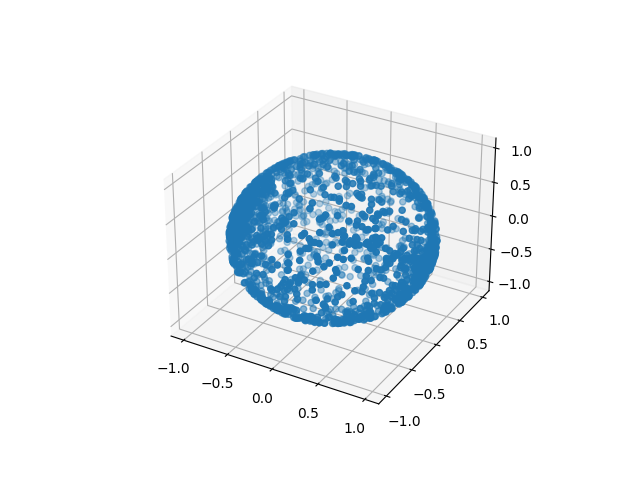

In [8]:
import matplotlib.pyplot as plt
[x,y,z] = list(zip(*unit_sphere_output))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)